In [1]:
# first I should make a histogram of the single star chi2
import pandas as pd
from binary_model import *
%pylab inline

doppleganger_flux = pd.read_csv('./data/gaia_rvs_dataframes/galah_dopplegangers_flux.csv')
doppleganger_sigma = pd.read_csv('./data/gaia_rvs_dataframes/galah_dopplegangers_sigma.csv')
doppleganger_labels = pd.read_csv('./data/galah_label_dataframes/galah_dopplegangers_labels.csv')

binary_flux = pd.read_csv('./data/gaia_rvs_dataframes/galah_binaries_flux.csv')
binary_sigma = pd.read_csv('./data/gaia_rvs_dataframes/galah_binaries_sigma.csv')
binary_labels = pd.read_csv('./data/galah_label_dataframes/galah_binaries_labels.csv')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
doppleganger_single_chisq = []
doppleganger_delta_chisq = []
doppleganger_training_density = []
for source_id in doppleganger_labels.source_id.to_numpy():
    flux = doppleganger_flux[str(source_id)]
    sigma = doppleganger_sigma[str(source_id)]
    
    # fit a binary and secondary to the data
    single_fit_labels, single_fit_chisq = fit_single_star(flux, sigma)
    binary_fit_labels, binary_fit_chisq = fit_binary(flux, sigma)
    
    doppleganger_single_chisq.append(single_fit_chisq)
    doppleganger_delta_chisq.append(single_fit_chisq - binary_fit_chisq)
    doppleganger_training_density.append(training_set_density(single_fit_labels))
    

In [3]:
binary_single_chisq = []
binary_delta_chisq = []
binary_training_density = []

for source_id in binary_labels.source_id.to_numpy():
    flux = binary_flux[str(source_id)]
    sigma = binary_sigma[str(source_id)]
    
    # fit a binary and secondary to the data
    single_fit_labels, single_fit_chisq = fit_single_star(flux, sigma)
    binary_fit_labels, binary_fit_chisq = fit_binary(flux, sigma)
    
    binary_single_chisq.append(single_fit_chisq)
    binary_delta_chisq.append(single_fit_chisq - binary_fit_chisq)
    binary_training_density.append(training_set_density(single_fit_labels))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2., 13.,
        24., 25., 23., 15., 10.,  8.,  3.,  2.,  0.,  4.,  6.,  6.,  2.,
         1.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,
         0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.]),
 array([3.2       , 3.21632653, 3.23265306, 3.24897959, 3.26530612,
        3.28163265, 3.29795918, 3.31428571, 3.33061224, 3.34693878,
        3.36326531, 3.37959184, 3.39591837, 3.4122449 , 3.42857143,
        3.44489796, 3.46122449, 3.47755102, 3.49387755, 3.51020408,
        3.52653061, 3.54285714, 3.55918367, 3.5755102 , 3.59183673,
        3.60816327, 3.6244898 , 3.64081633, 3.65714286, 3.67346939,
        3.68979592, 3.70612245, 3.72244898, 3.73877551, 3.75510204,
        3.77142857, 3.7877551 , 3.80408163, 3.82040816, 3.83673469,
        3.85306122, 3.86938776, 3.88571429, 3.90204082, 3.91836735,
        3.93469388, 3.95102041, 3.96734694, 3.98367347, 4.        ]),
 <BarContainer object of 49 artists>)

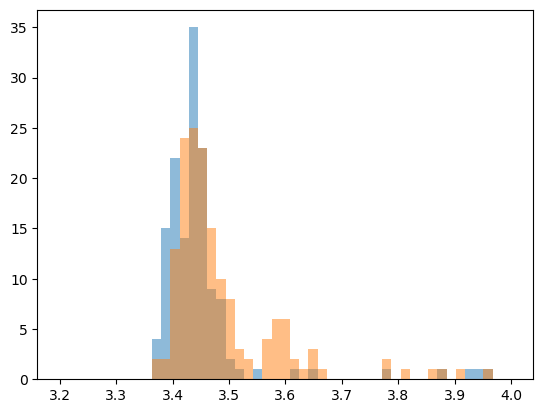

In [4]:
# single_chisq_bins = np.linspace(0,10000,60)
# hist(doppleganger_single_chisq, bins=single_chisq_bins, alpha=0.5)
# hist(binary_single_chisq, bins=single_chisq_bins, alpha=0.5) # this should be larger for binaries

log_single_chisq_bins = np.linspace(3.2,4,50)
hist(np.log10(doppleganger_single_chisq), bins=log_single_chisq_bins, alpha=0.5)
hist(np.log10(binary_single_chisq), bins=log_single_chisq_bins, alpha=0.5)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  2.,  2.,  5.,  6.,  9., 12., 15., 12., 16., 12.,
         9.,  5.,  9.,  6.,  8.,  4.,  1.]),
 array([-3.        , -2.89830508, -2.79661017, -2.69491525, -2.59322034,
        -2.49152542, -2.38983051, -2.28813559, -2.18644068, -2.08474576,
        -1.98305085, -1.88135593, -1.77966102, -1.6779661 , -1.57627119,
        -1.47457627, -1.37288136, -1.27118644, -1.16949153, -1.06779661,
        -0.96610169, -0.86440678, -0.76271186, -0.66101695, -0.55932203,
        -0.45762712, -0.3559322 , -0.25423729, -0.15254237, -0.05084746,
         0.05084746,  0.15254237,  0.25423729,  0.3559322 ,  0.45762712,
         0.55932203,  0.66101695,  0.76271186,  0.86440678,  0.96610169,
         1.06779661,  1.16949153,  1.27118644,  1.37288136,  1.47457627,
      

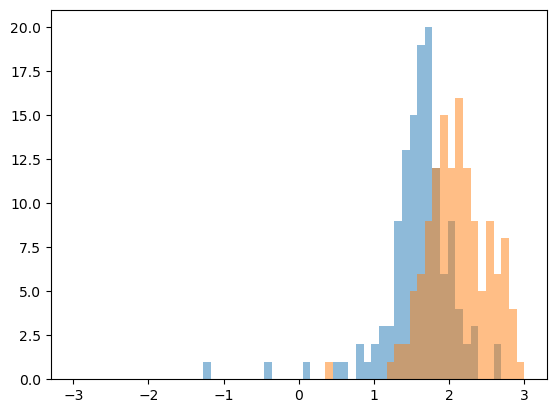

In [5]:
# delta_chisq_bins = np.linspace(-2000,2000,60)
# hist(doppleganger_delta_chisq, bins=delta_chisq_bins, alpha=0.5)
# hist(binary_delta_chisq, bins=delta_chisq_bins, alpha=0.5) # this should be larger for binaries
# this looks great!
log_delta_chisq_bins = np.linspace(-3,3,60)
hist(np.log10(doppleganger_delta_chisq), bins=log_delta_chisq_bins, alpha=0.5)
hist(np.log10(binary_delta_chisq), bins=log_delta_chisq_bins, alpha=0.5)

(array([39., 13., 13., 16., 12., 12.,  7.,  3.,  3.,  6.,  4.,  3.,  1.,
         3.,  4.,  3.,  1.,  1.,  3.,  1.,  2.,  2.,  1.,  2.,  1.,  1.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.25641026,  0.51282051,  0.76923077,  1.02564103,
         1.28205128,  1.53846154,  1.79487179,  2.05128205,  2.30769231,
         2.56410256,  2.82051282,  3.07692308,  3.33333333,  3.58974359,
         3.84615385,  4.1025641 ,  4.35897436,  4.61538462,  4.87179487,
         5.12820513,  5.38461538,  5.64102564,  5.8974359 ,  6.15384615,
         6.41025641,  6.66666667,  6.92307692,  7.17948718,  7.43589744,
         7.69230769,  7.94871795,  8.20512821,  8.46153846,  8.71794872,
         8.97435897,  9.23076923,  9.48717949,  9.74358974, 10.        ]),
 <BarContainer object of 39 artists>)

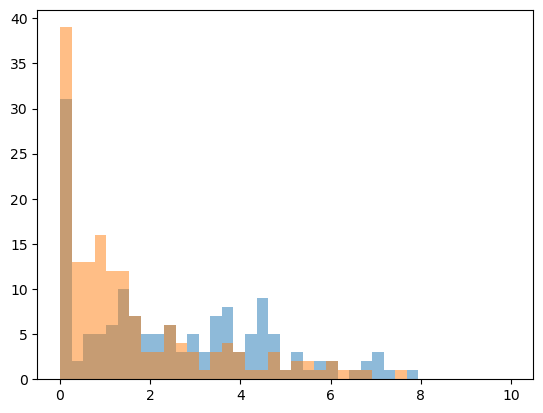

In [6]:
training_density_bins=np.linspace(0,10, 40)
hist(doppleganger_training_density, bins=training_density_bins, alpha=0.5)
hist(binary_training_density, bins=training_density_bins, alpha=0.5)  # these should be lower

Text(0.5, 0, 'training set\nneighbor density')

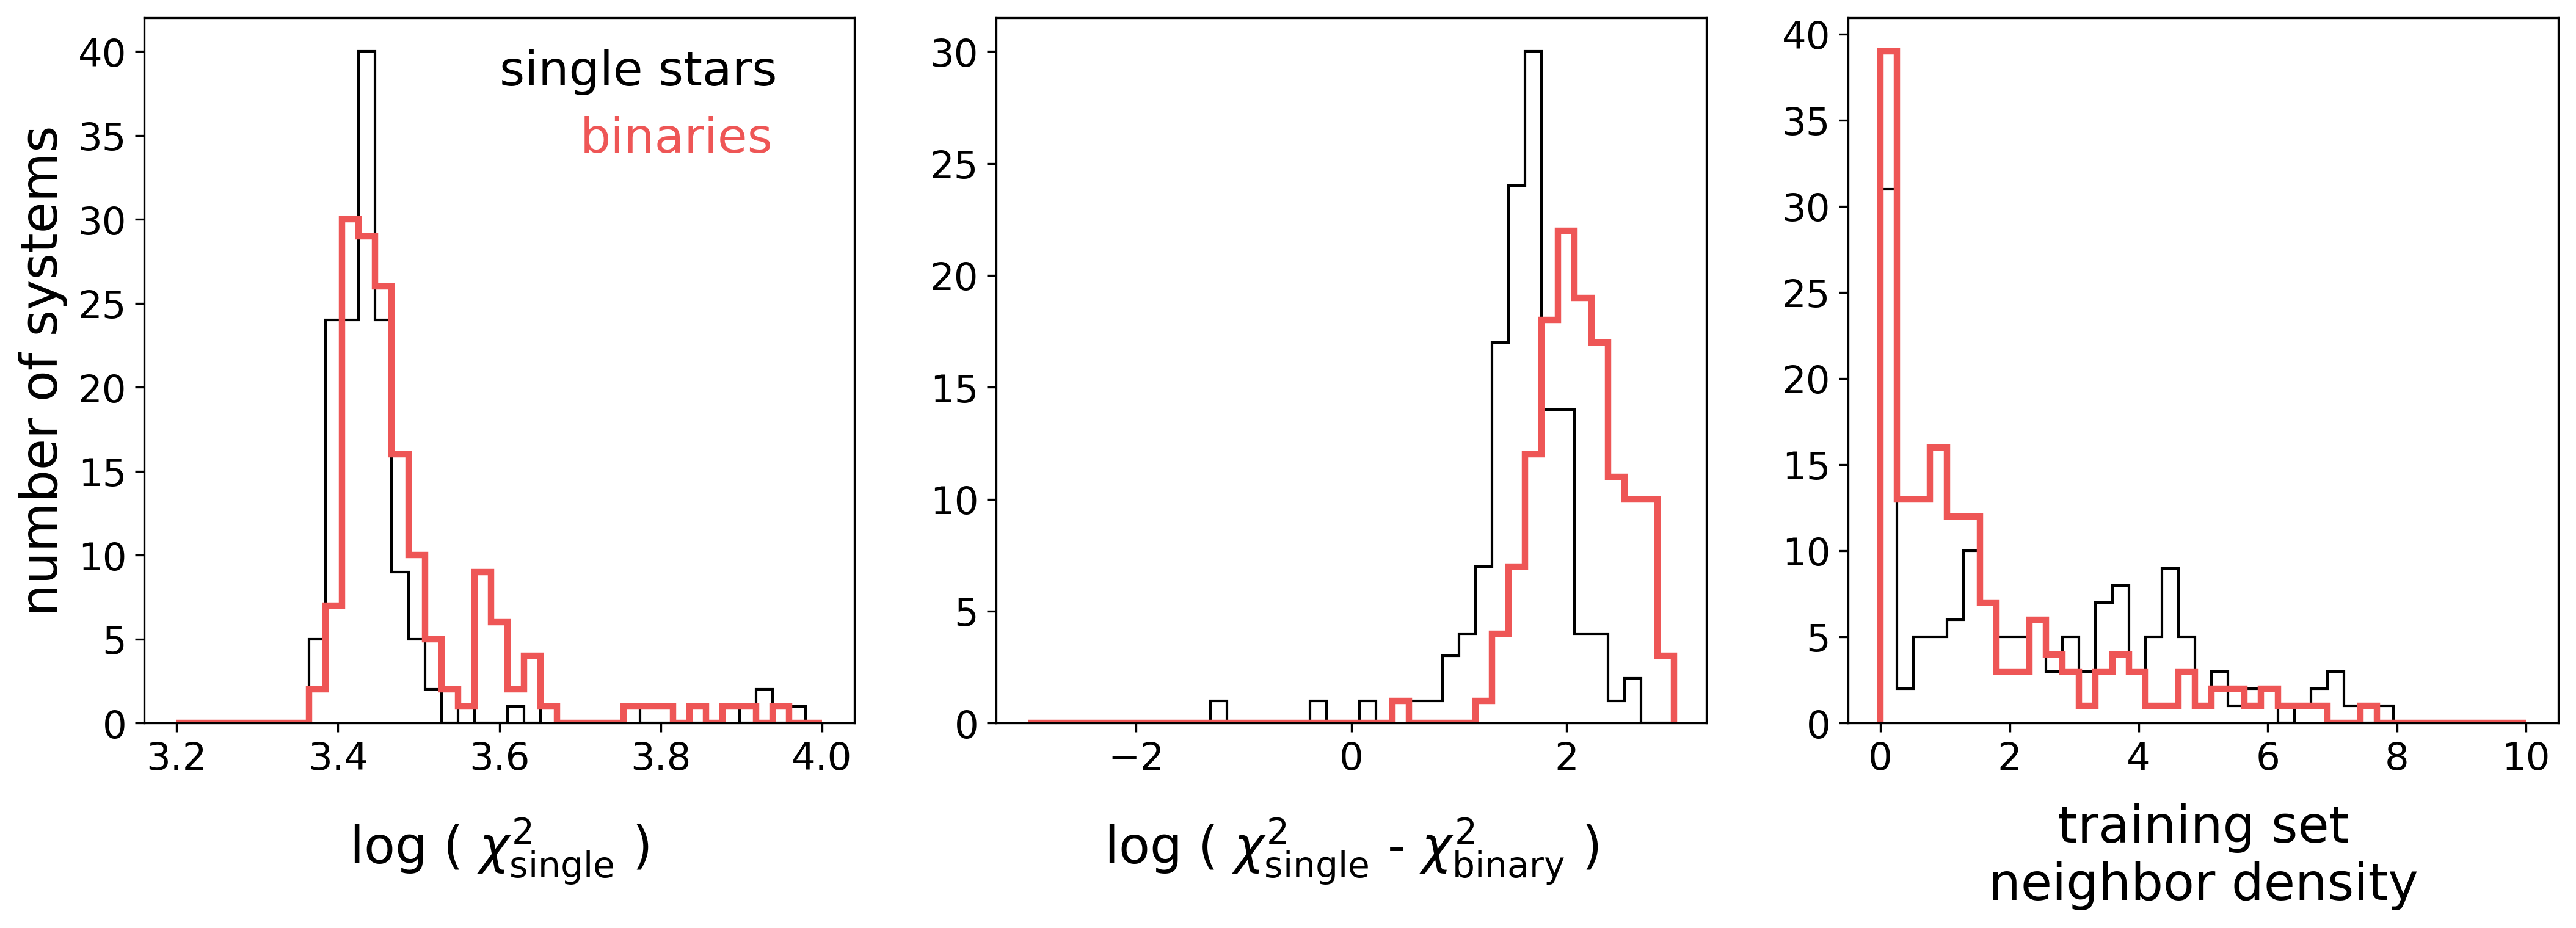

In [7]:
# so fun! now it's time to plot the 3 histograms
primary_color='#91A8D6'
secondary_color='#B03838'
single_fit_color='#DEB23C'
binary_fit_color = '#313DF7'
binary_color = '#EE5656'

rcParams['figure.dpi']=300
rcParams['font.size']=15
figure(figsize=(17,5))
subplot(131)
log_single_chisq_bins = np.linspace(3.2,4,40)
hist(np.log10(doppleganger_single_chisq), bins=log_single_chisq_bins,
    histtype='step', color='k')
hist(np.log10(binary_single_chisq), bins=log_single_chisq_bins,
    histtype='step', color=binary_color, lw=2.5)
text(3.6,38,'single stars', fontsize=19)
text(3.7,34,'binaries', color=binary_color, fontsize=19)
ylabel('number of systems', fontsize=20)
xlabel(r'log ( $\chi^2_{\rm single}$ )', fontsize=20, labelpad=15)

subplot(132)
log_delta_chisq_bins = np.linspace(-3,3,40)
hist(np.log10(doppleganger_delta_chisq), bins=log_delta_chisq_bins, 
    histtype='step', color='k')
hist(np.log10(binary_delta_chisq), bins=log_delta_chisq_bins, 
    histtype='step', color=binary_color, lw=2.5)
xlabel(r'log ( $\chi^2_{\rm single}$ - $\chi^2_{\rm binary}$ )', fontsize=20, labelpad=15)

subplot(133)
training_density_bins=np.linspace(0,10, 40)
hist(doppleganger_training_density, bins=training_density_bins,
    histtype='step', color='k')
hist(binary_training_density, bins=training_density_bins,
    histtype='step', color=binary_color, lw=2.5)
xlabel('training set\nneighbor density', fontsize=20, labelpad=10)

In [8]:
# how can I get the training set density for the training set itself
training_flux = pd.read_csv('./data/gaia_rvs_dataframes/galah_binaries_flux.csv')
training_sigma = pd.read_csv('./data/gaia_rvs_dataframes/galah_binaries_sigma.csv')
training_labels = pd.read_csv('./data/galah_label_dataframes/galah_binaries_labels.csv')

training_training_density = []
for source_id in training_labels.source_id.to_numpy():
    flux = training_flux[str(source_id)]
    sigma = training_sigma[str(source_id)]
    
    # fit a binary and secondary to the data
    single_fit_labels, single_fit_chisq = fit_single_star(flux, sigma)
    binary_fit_labels, binary_fit_chisq = fit_binary(flux, sigma)
    
    training_training_density.append(training_set_density(single_fit_labels))

In [9]:
np.median(training_training_density) 
# shouldn't this be much larger...
# oh no...

1.024

(array([39., 13., 13., 16., 12., 12.,  7.,  3.,  3.,  6.,  4.,  3.,  1.,
         3.,  4.,  3.,  1.,  1.,  3.,  1.,  2.,  2.,  1.,  2.,  1.,  1.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.        ,  0.25641026,  0.51282051,  0.76923077,  1.02564103,
         1.28205128,  1.53846154,  1.79487179,  2.05128205,  2.30769231,
         2.56410256,  2.82051282,  3.07692308,  3.33333333,  3.58974359,
         3.84615385,  4.1025641 ,  4.35897436,  4.61538462,  4.87179487,
         5.12820513,  5.38461538,  5.64102564,  5.8974359 ,  6.15384615,
         6.41025641,  6.66666667,  6.92307692,  7.17948718,  7.43589744,
         7.69230769,  7.94871795,  8.20512821,  8.46153846,  8.71794872,
         8.97435897,  9.23076923,  9.48717949,  9.74358974, 10.        ]),
 <BarContainer object of 39 artists>)

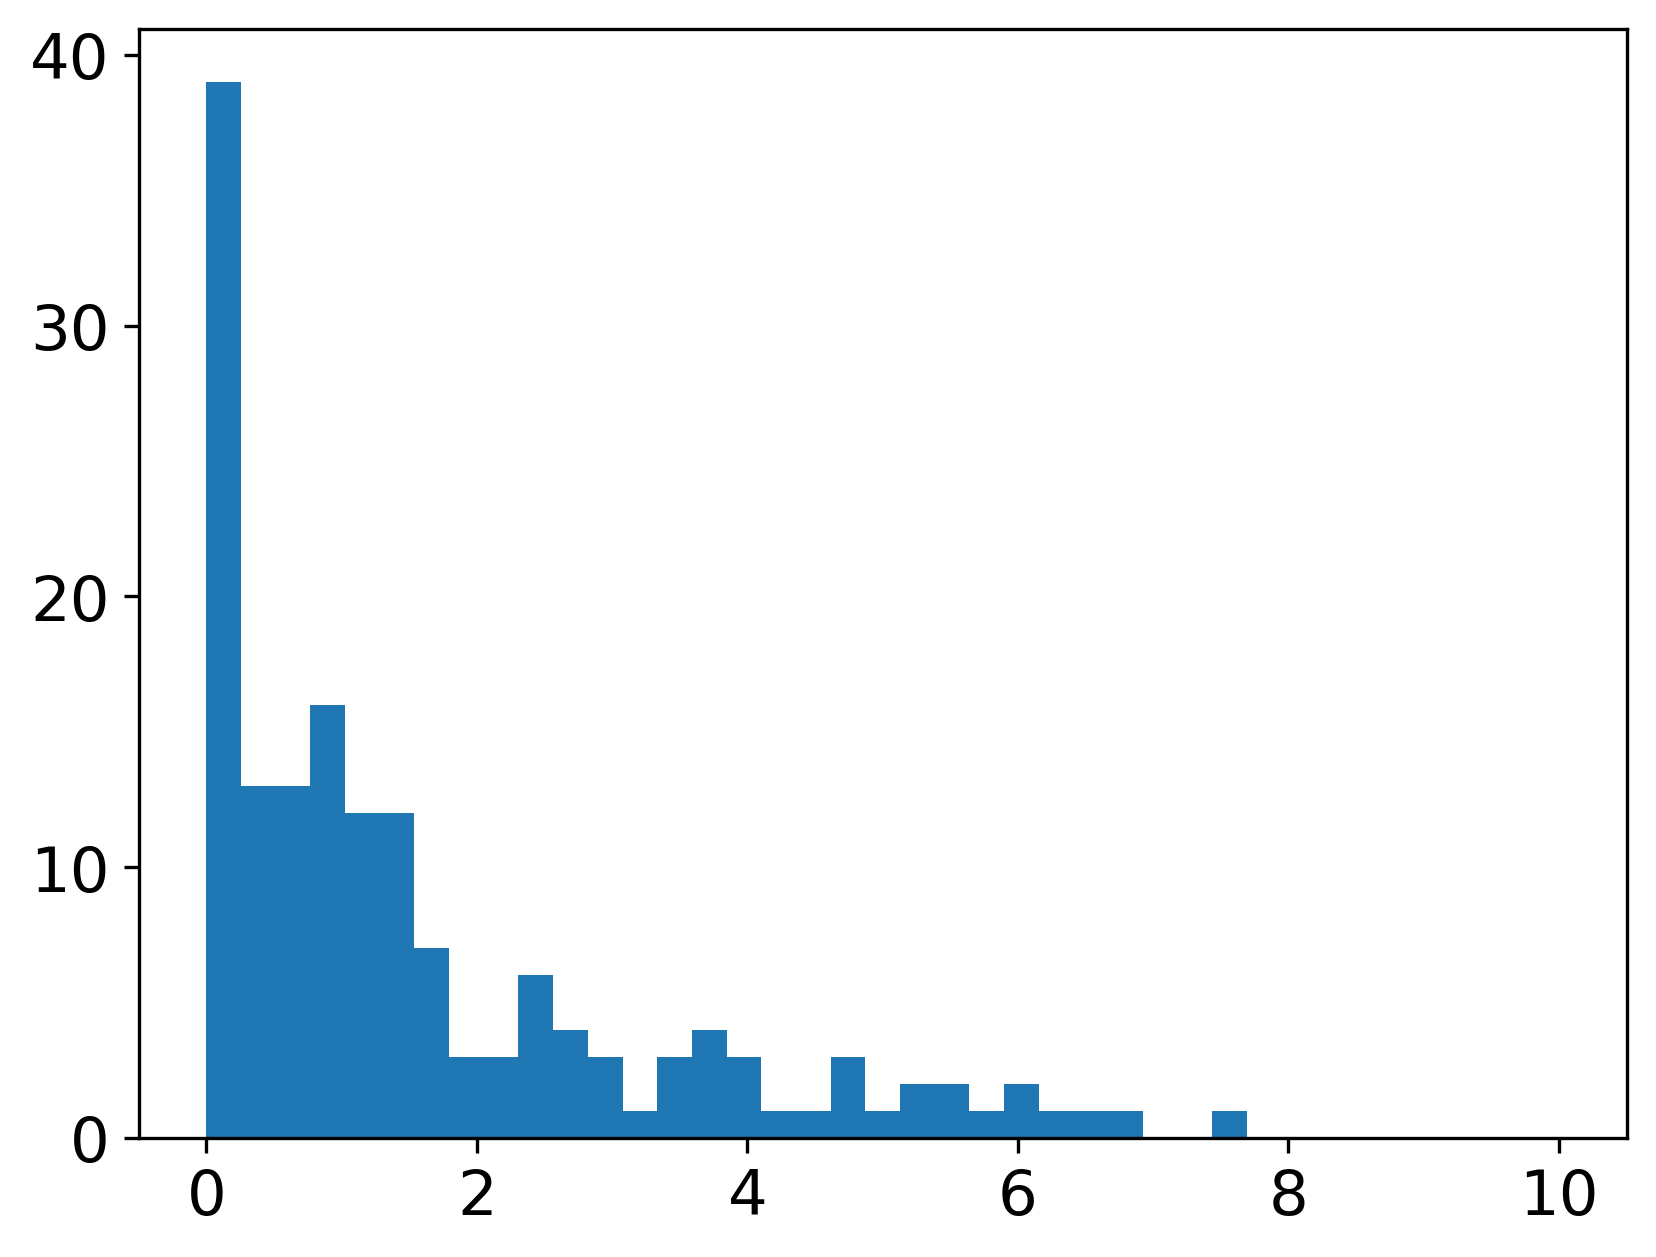

In [10]:
hist(training_training_density, bins=training_density_bins)

In [ ]:
# okay, I think it's working fine.
# I'm going to report the average for the training set, which is 3.4
# now I just need to change the numbers for the test cases.
# okay yay! now I can just work on the plot part :^)
# and maybe I cna go to the github workshop but just sit in the back?
